In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [13]:
import os
print(os.listdir())  # Check if "marketing_campaign_dataset.csv" is in this list

['.virtual_documents']


In [1]:
import os
print(os.listdir("/kaggle/input"))

['telco-customer-churn', 'wa-fn-usec-telco-customer-chrun-csv']


In [21]:
import os
print(os.listdir("/kaggle/input/wa-fn-usec-telco-customer-chrun-csv"))

['WA_Fn-UseC_-Telco-Customer-Churn.csv']


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print('done')  # Verify data loads correctly 

done


In [3]:
import pandas as pd

file_path = "/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv"
churn_telco = pd.read_csv(file_path)

print(churn_telco.head())  # Verify data loads correctly

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [4]:
print(churn_telco.isnull().sum())  # Check for missing values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [29]:
churn_performance = churn_telco.groupby('Churn')['MonthlyCharges'].mean().sort_values(ascending=False)
print(churn_performance)

Churn
Yes    74.441332
No     61.265124
Name: MonthlyCharges, dtype: float64


In [16]:
churn_telco_encoded = churn_telco.copy()
for col in churn_telco_encoded.select_dtypes(include=['object']).columns:
    churn_telco_encoded[col] = churn_telco_encoded[col].astype('category').cat.codes

print('done')  # Verify data loads correctly 

done


In [18]:
corr_matrix = churn_telco_encoded.corr()

print('done')  # Verify data loads correctly 

done


In [19]:
print(churn_telco_encoded.head())

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0        5375       0              0        1           0       1   
1        3962       1              0        0           0      34   
2        2564       1              0        0           0       2   
3        5535       1              0        0           0      45   
4        6511       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   


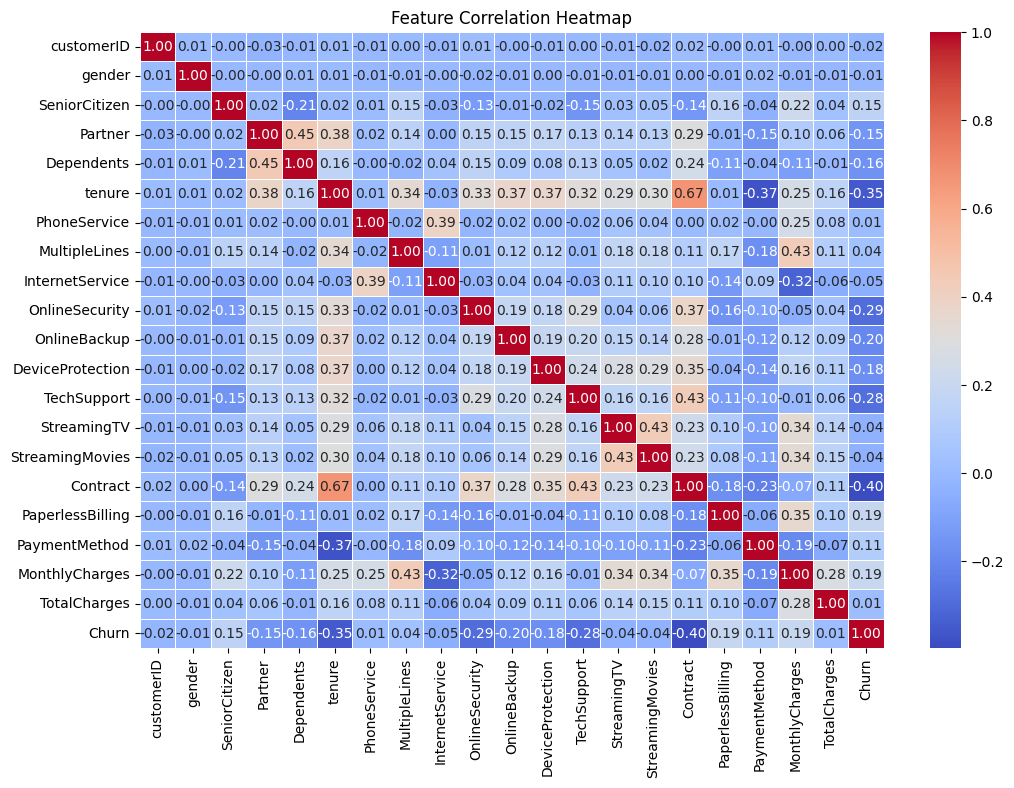

In [73]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.savefig("/kaggle/working/feature_correlation_heatmap.png", dpi=300)
plt.show()

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
correlation_matrix = churn_telco_encoded.corr()

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


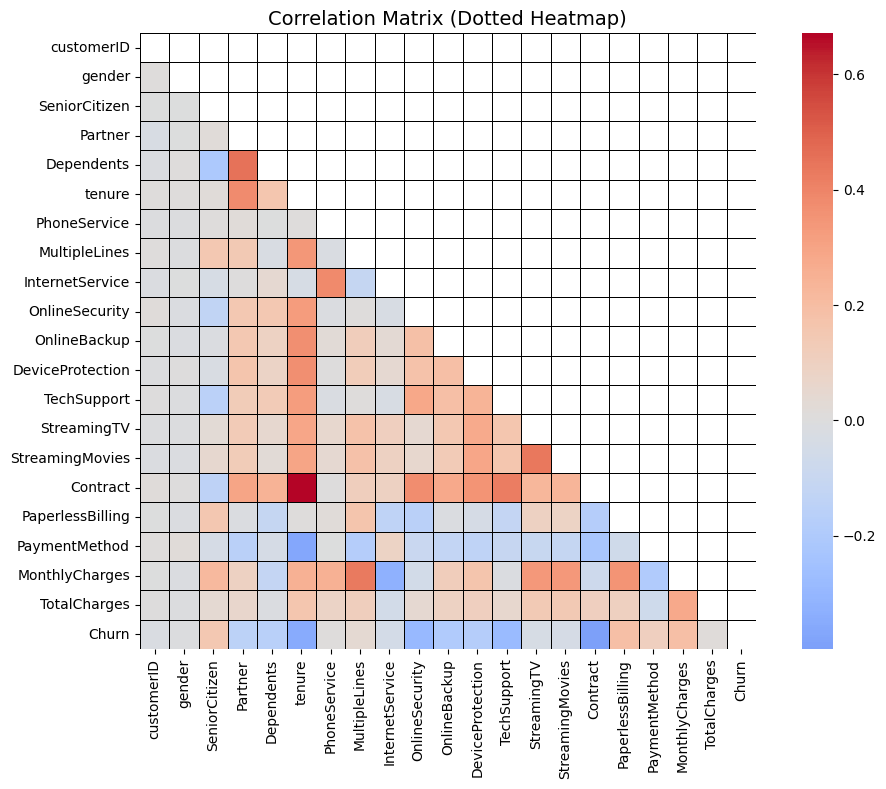

In [72]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5, linecolor='black', 
            cbar=True, fmt=".2f", center=0, square=True, mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)))

plt.title("Correlation Matrix (Dotted Heatmap)", fontsize=14)
plt.savefig("/kaggle/working/correlation_matrix_dotted_heatmap.png", dpi=300)
plt.show()

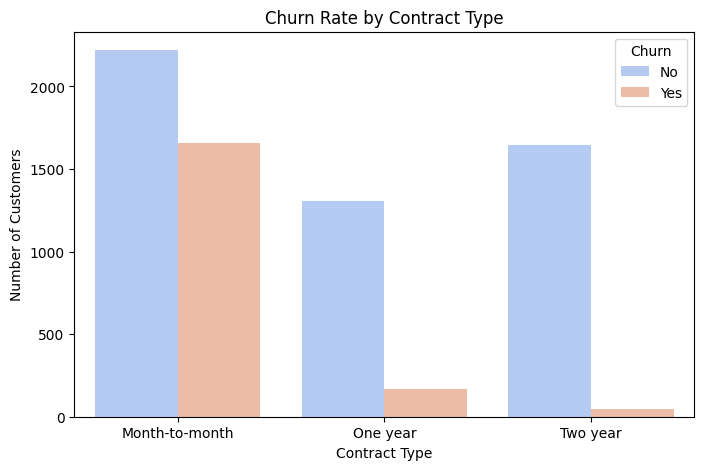

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot for contract type and churn
plt.figure(figsize=(8,5))
sns.countplot(data=churn_telco, x='Contract', hue='Churn', palette='coolwarm')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

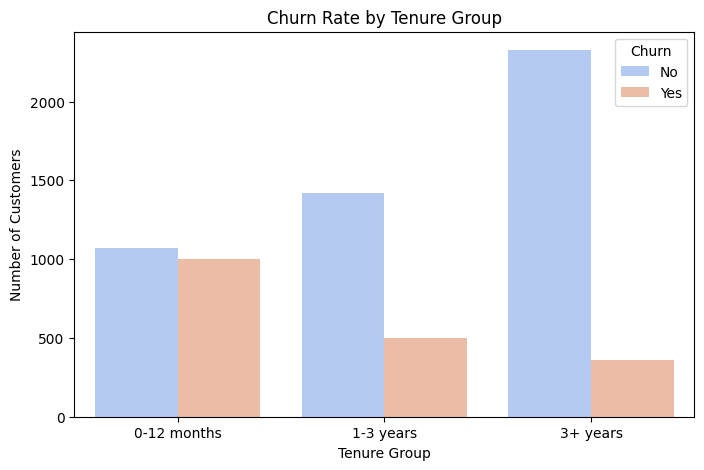

In [71]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Create tenure bins
bins = [0, 12, 36, churn_telco['tenure'].max()]
labels = ['0-12 months', '1-3 years', '3+ years']
churn_telco['Tenure Group'] = pd.cut(churn_telco['tenure'], bins=bins, labels=labels, right=False)

# Plot churn rate by tenure group
plt.figure(figsize=(8,5))
sns.countplot(data=churn_telco, x='Tenure Group', hue='Churn', palette='coolwarm')
plt.title('Churn Rate by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.savefig("/kaggle/working/churn_rate_by_tenure_group.png", dpi=300)
plt.show()

In [79]:
# Define add-on services (double-check these column names)
add_on_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Check unique values in each add-on column
for col in add_on_services:
    print(f"{col} unique values: {churn_telco[col].unique()}")

OnlineSecurity unique values: [0 1]
OnlineBackup unique values: [1 0]
DeviceProtection unique values: [0 1]
TechSupport unique values: [0 1]
StreamingTV unique values: [0 1]
StreamingMovies unique values: [0 1]


In [80]:
# Correct calculation for total add-ons
churn_telco['Total_Add_Ons'] = churn_telco[add_on_services].sum(axis=1)

# Verify the updated values
print(churn_telco['Total_Add_Ons'].describe())
print(churn_telco[['Contract', 'Tenure Group', 'Total_Add_Ons']].head(10))

count    7043.000000
mean        2.037910
std         1.847682
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: Total_Add_Ons, dtype: float64
         Contract Tenure Group  Total_Add_Ons
0  Month-to-month  0-12 months              1
1        One year    1-3 years              2
2  Month-to-month  0-12 months              2
3        One year     3+ years              3
4  Month-to-month  0-12 months              0
5  Month-to-month  0-12 months              3
6  Month-to-month    1-3 years              2
7  Month-to-month  0-12 months              1
8  Month-to-month    1-3 years              4
9        One year     3+ years              2


In [82]:
addon_by_contract = churn_telco.groupby(['Contract', 'Tenure Group'])['Total_Add_Ons'].mean().unstack()

# Check if the values are meaningful
print(addon_by_contract)

Tenure Group    0-12 months  1-3 years  3+ years
Contract                                        
Month-to-month          0.0        0.0       0.0
One year                0.0        0.0       0.0
Two year                0.0        0.0       0.0


In [83]:
print(addon_by_contract.isnull().sum())  # Check if any NaN values exist

Tenure Group
0-12 months    0
1-3 years      0
3+ years       0
dtype: int64


In [87]:
addon_by_contract = addon_by_contract.fillna(0)  # Replace NaNs with 0

print('done') # verify the data was loads correctly 

done


In [89]:
# Check if Total_Add_Ons contains non-zero values
print(churn_telco[['Total_Add_Ons']].describe())
print(churn_telco[['Total_Add_Ons']].value_counts()) # Check distribution

       Total_Add_Ons
count         7043.0
mean             0.0
std              0.0
min              0.0
25%              0.0
50%              0.0
75%              0.0
max              0.0
Total_Add_Ons
0                7043
Name: count, dtype: int64


In [90]:
# Recalculate Total_Add_Ons
add_on_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

churn_telco['Total_Add_Ons'] = churn_telco[add_on_services].sum(axis=1)

# Verify that it's not all zero
print(churn_telco[['Total_Add_Ons']].describe())
print(churn_telco[['Total_Add_Ons']].value_counts()) 

       Total_Add_Ons
count    7043.000000
mean        2.037910
std         1.847682
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max         6.000000
Total_Add_Ons
0                2219
3                1118
2                1033
1                 966
4                 852
5                 571
6                 284
Name: count, dtype: int64


In [91]:
addon_by_contract = churn_telco.groupby(['Contract', 'Tenure Group'])['Total_Add_Ons'].mean().unstack()
print(addon_by_contract)  # Should now contain non-zero values

Tenure Group    0-12 months  1-3 years  3+ years
Contract                                        
Month-to-month     0.988470   1.821290  2.616519
One year           0.852941   1.808889  3.006637
Two year           1.101695   1.145161  2.705510


<Figure size 1000x600 with 0 Axes>

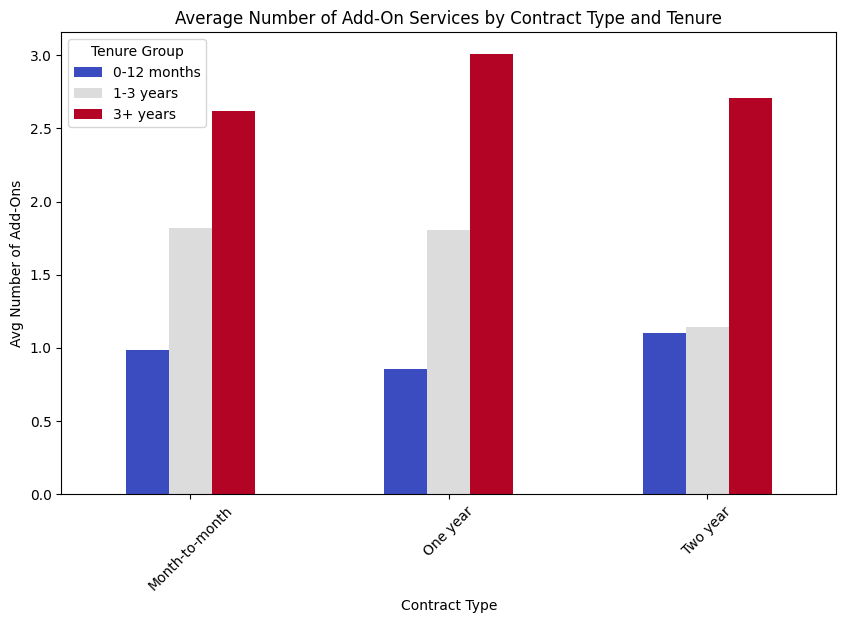

In [92]:
plt.figure(figsize=(10, 6))
addon_by_contract.plot(kind='bar', stacked=False, colormap='coolwarm', figsize=(10, 6))
plt.title("Average Number of Add-On Services by Contract Type and Tenure")
plt.ylabel("Avg Number of Add-Ons")
plt.xlabel("Contract Type")
plt.xticks(rotation=45)
plt.legend(title="Tenure Group")
plt.savefig('/kaggle/working/average_add_ons_by_contract_and_tenure.png', dpi=300)
plt.show()

In [38]:
# Define the add-on service columns
add_on_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Replace categorical values with numeric equivalents
for col in add_on_services:
    churn_telco[col] = churn_telco[col].replace({'Yes': 1, 'No': 0, 'No internet service': 0}).astype(int)

# Now retry the aggregation
add_on_summary = churn_telco.groupby('Contract')[add_on_services].mean() * 100

# Check if conversion worked
print(churn_telco[add_on_services].dtypes)
print(add_on_summary)

OnlineSecurity      int64
OnlineBackup        int64
DeviceProtection    int64
TechSupport         int64
StreamingTV         int64
StreamingMovies     int64
dtype: object
                OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
Contract                                                                      
Month-to-month       18.580645     27.432258         24.696774    17.316129   
One year             37.474542     42.226748         43.856076    37.474542   
Two year             44.070796     43.893805         48.318584    48.436578   

                StreamingTV  StreamingMovies  
Contract                                      
Month-to-month    33.496774        33.651613  
One year          44.263408        44.942295  
Two year          44.660767        45.191740  


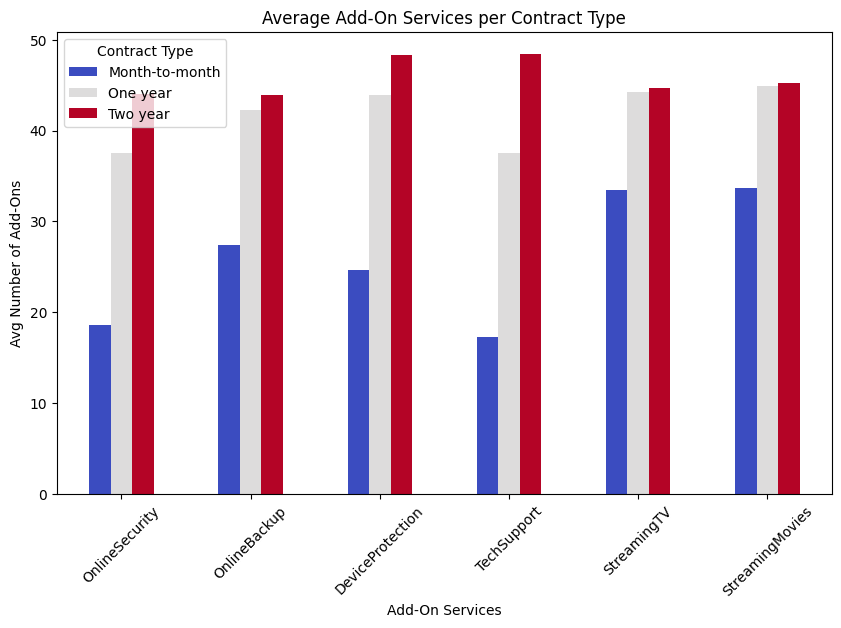

In [68]:
# Visualize average add-on services per contract type
add_on_summary.T.plot(kind='bar', figsize=(10,6), colormap='coolwarm')
plt.title("Average Add-On Services per Contract Type")
plt.ylabel("Avg Number of Add-Ons")
plt.xlabel("Add-On Services")
plt.xticks(rotation=45)
plt.legend(title="Contract Type")
plt.savefig("/kaggle/working/average_add_on_services_by_contract_type.png", dpi=300)
plt.show()

In [40]:
import pandas as pd

# Select customers on month-to-month contracts
month_to_month_customers = churn_telco[churn_telco['Contract'] == 'Month-to-month']

# Identify customers with no add-ons (all services = "No")
no_addon_customers = month_to_month_customers[
    (month_to_month_customers[['OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies']] == 'No').all(axis=1)
]

# Count of customers with no add-ons
print(f"Total Month-to-Month Customers: {len(month_to_month_customers)}")
print(f"Customers with No Add-Ons: {len(no_addon_customers)}")

Total Month-to-Month Customers: 3875
Customers with No Add-Ons: 0


Contract
Two year          60.770413
One year          65.048608
Month-to-month    66.398490
Name: MonthlyCharges, dtype: float64


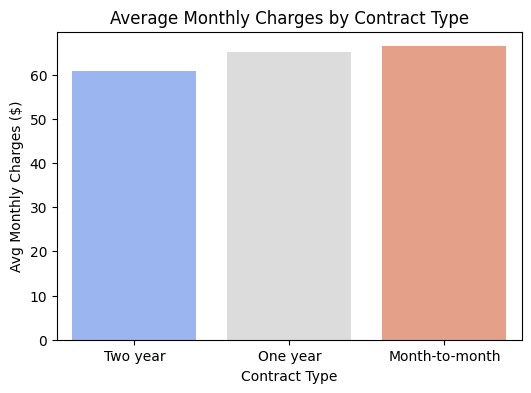

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compare average monthly charges by contract type
contract_charges = churn_telco.groupby('Contract')['MonthlyCharges'].mean().sort_values()

print(contract_charges)

# Plot the comparison
plt.figure(figsize=(6,4))
sns.barplot(x=contract_charges.index, y=contract_charges.values, palette="coolwarm")
plt.title("Average Monthly Charges by Contract Type")
plt.ylabel("Avg Monthly Charges ($)")
plt.xlabel("Contract Type")
plt.savefig("/kaggle/working/average_monthly_changes_by_contract_type.png", dpi=300)
plt.show()

Tenure Group
0-12 months    1908
1-3 years      1287
3+ years        678
dtype: int64


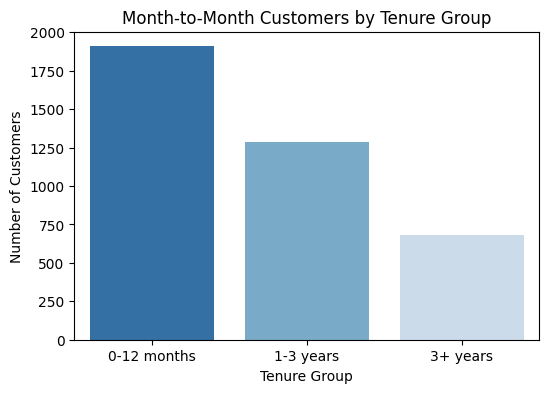

In [66]:
# Categorize tenure into groups
bins = [0, 12, 36, churn_telco['tenure'].max()]
labels = ['0-12 months', '1-3 years', '3+ years']

churn_telco['Tenure Group'] = pd.cut(churn_telco['tenure'], bins=bins, labels=labels, right=False)

# Count month-to-month customers per tenure group
tenure_counts = churn_telco[churn_telco['Contract'] == 'Month-to-month'].groupby('Tenure Group').size()

print(tenure_counts)

# Plot the distribution
plt.figure(figsize=(6,4))
sns.barplot(x=tenure_counts.index, y=tenure_counts.values, palette="Blues_r")
plt.title("Month-to-Month Customers by Tenure Group")
plt.ylabel("Number of Customers")
plt.xlabel("Tenure Group")
plt.savefig("/kaggle/working/month_to_month_customers_by_tenure_group.png", dpi=300)
plt.show()

In [45]:
# Find month-to-month customers paying above average
high_pay_customers = churn_telco[
    (churn_telco['Contract'] == 'Month-to-month') & 
    (churn_telco['MonthlyCharges'] > contract_charges['One year'])
]

# Assume 30% of them convert if offered a discount
conversion_rate = 0.30
potential_conversions = int(len(high_pay_customers) * conversion_rate)

print(f"Estimated customers converting with a lower rate: {potential_conversions}")

# Revenue impact (assuming they move to a lower rate contract)
discounted_rate = contract_charges['One year']
expected_revenue_increase = potential_conversions * discounted_rate * 12  # 12 months

print(f"Potential Revenue Impact: ${expected_revenue_increase:,.2f}")

Estimated customers converting with a lower rate: 687
Potential Revenue Impact: $536,260.73


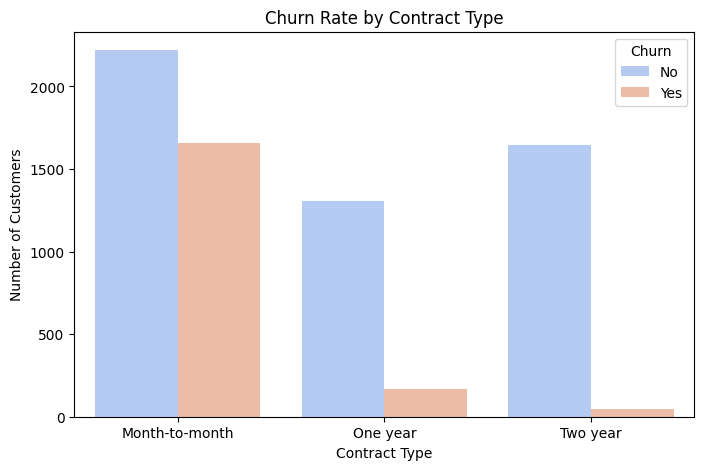

In [65]:
plt.figure(figsize=(8, 5))
sns.countplot(data=churn_telco, x="Contract", hue="Churn", palette="coolwarm")
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.savefig("/kaggle/working/churn_rate_by_contract_type.png", dpi=300)
plt.show()

In [50]:
print(churn_telco.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Tenure Group', 'Total_Add_Ons'],
      dtype='object')


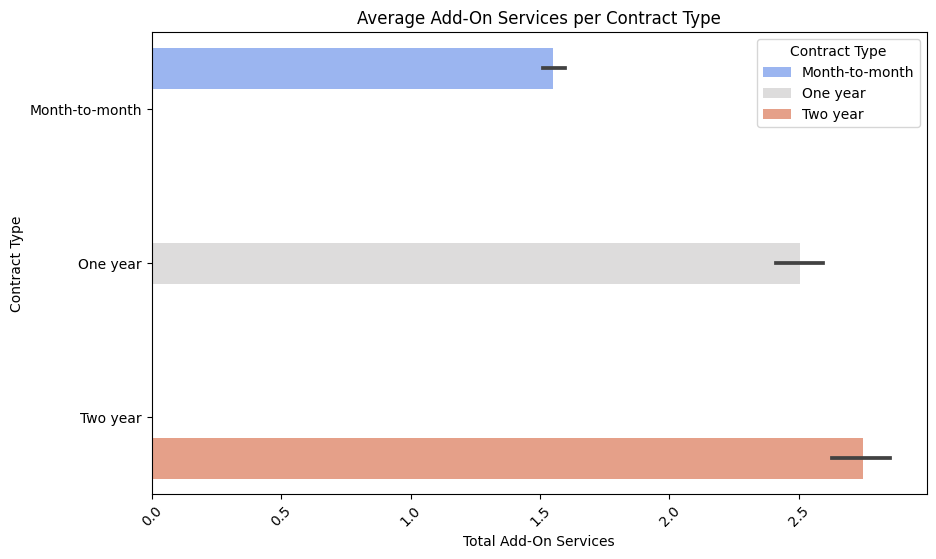

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(data=churn_telco, x="Total_Add_Ons", y="Contract", hue="Contract", palette="coolwarm")

plt.title("Average Add-On Services per Contract Type")
plt.xlabel("Total Add-On Services")
plt.ylabel("Contract Type")
plt.xticks(rotation=45)
plt.legend(title="Contract Type")
plt.savefig("/kaggle/working/total_add_ons.png", dpi=300)
plt.show()

In [54]:
churn_telco["Total_Add_Ons"] = pd.to_numeric(churn_telco["Total_Add_Ons"], errors="coerce")

In [56]:
# Identify month-to-month customers who already purchase add-ons
potential_converts = churn_telco[(churn_telco['Contract'] == 'Month-to-month') & (churn_telco['Total_Add_Ons'] > 1)]

# Estimate conversion rate (Example: 30% of these customers switch with a loyalty bundle)
conversion_rate = 0.30
converted_customers = int(len(potential_converts) * conversion_rate)

# Predict new revenue increase (Assuming average contract price = $70)
new_revenue = converted_customers * 70

print(f"Estimated {converted_customers} customers will convert, generating ${new_revenue} in new monthly revenue.")

Estimated 541 customers will convert, generating $37870 in new monthly revenue.


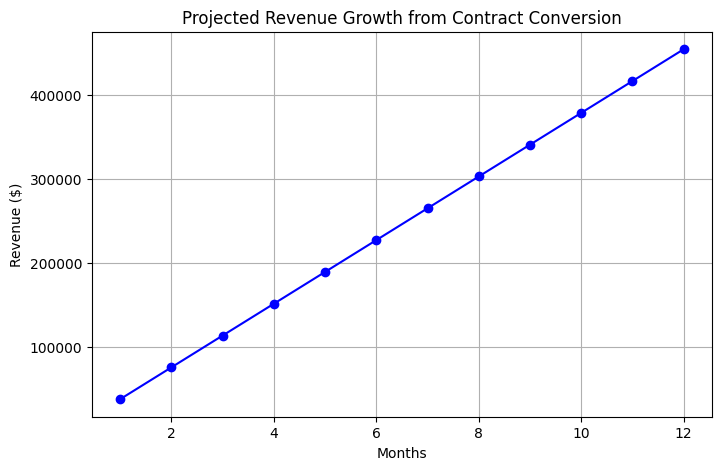

In [63]:
months = np.arange(1, 13)
forecast_revenue = [new_revenue * month for month in months]

plt.figure(figsize=(8, 5))
plt.plot(months, forecast_revenue, marker="o", linestyle="-", color="blue")
plt.title("Projected Revenue Growth from Contract Conversion")
plt.xlabel("Months")
plt.ylabel("Revenue ($)")
plt.grid(True)
plt.savefig("/kaggle/working/projected_revenue_growth_from_contract_concersion.png", dpi=300)
plt.show()

In [60]:
churn_telco.to_csv("/kaggle/working/churn_telco_cleaned.csv", index=False)